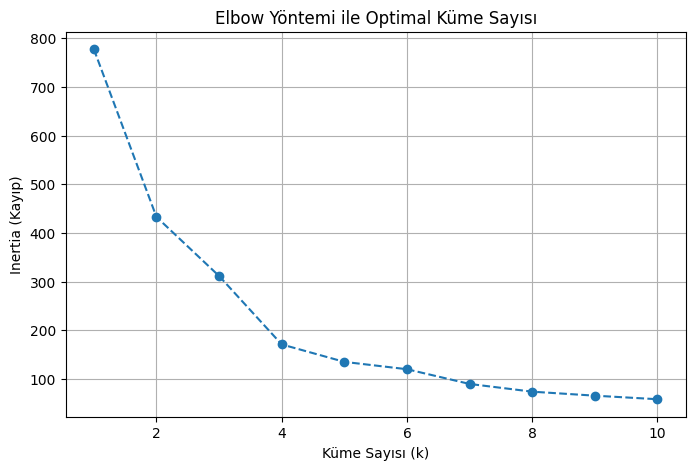

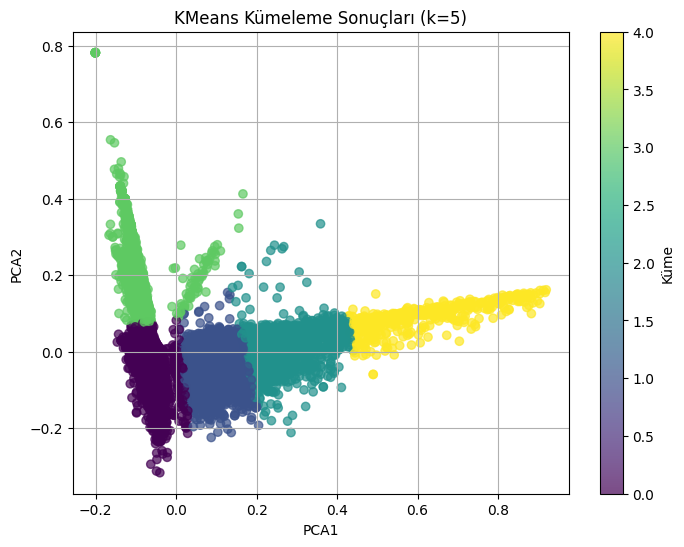

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = "train.csv"
data = pd.read_csv(file_path)
texts = data['text']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(texts)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())


range_clusters = range(1, 11)
inertia_values = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia_values, marker='o', linestyle='--')
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (Kayıp)")
plt.title("Elbow Yöntemi ile Optimal Küme Sayısı")
plt.grid()
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.7)
plt.title(f"KMeans Kümeleme Sonuçları (k={optimal_k})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Küme")
plt.grid()
plt.show()



Silüet Skoru (k=5): 0.5866921444190057
Aykırı Veri Sayısı: 2120
Aykırı Verilerin İndeksleri: [   20    37    41 ... 42333 42336 42371]


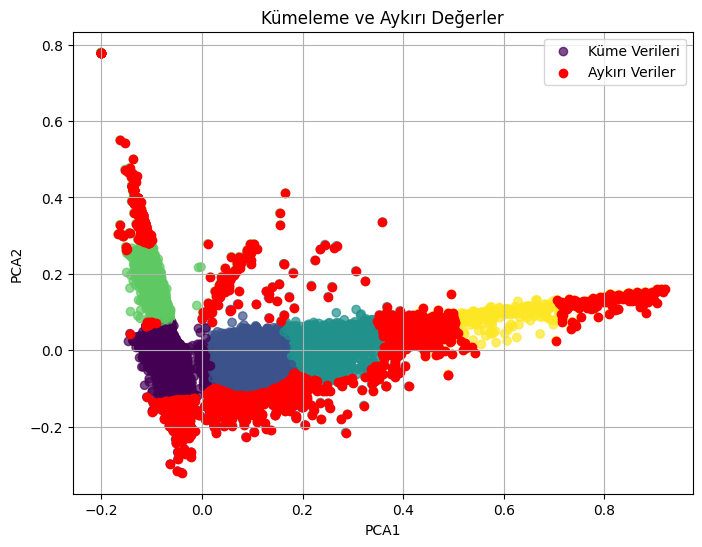

In [4]:
from sklearn.metrics import silhouette_score
import numpy as np

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silüet Skoru (k={optimal_k}): {silhouette_avg}")

distances = np.min(kmeans.transform(X_pca), axis=1)

threshold = np.percentile(distances, 95)
outliers = np.where(distances > threshold)[0]

print(f"Aykırı Veri Sayısı: {len(outliers)}")
print(f"Aykırı Verilerin İndeksleri: {outliers}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, label="Küme Verileri")
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], color='red', label="Aykırı Veriler")
plt.title("Kümeleme ve Aykırı Değerler")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()


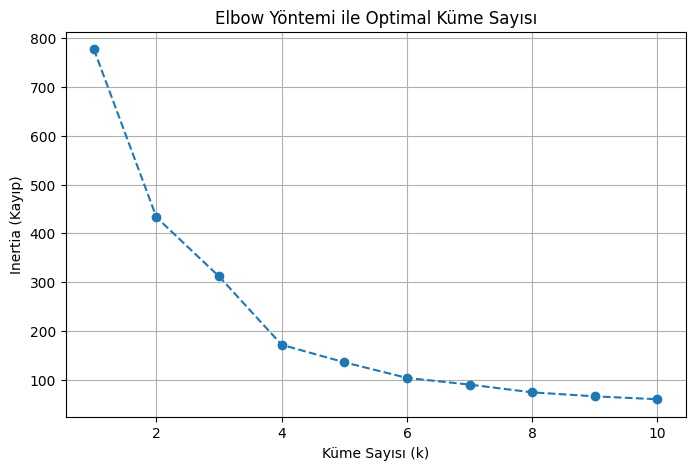

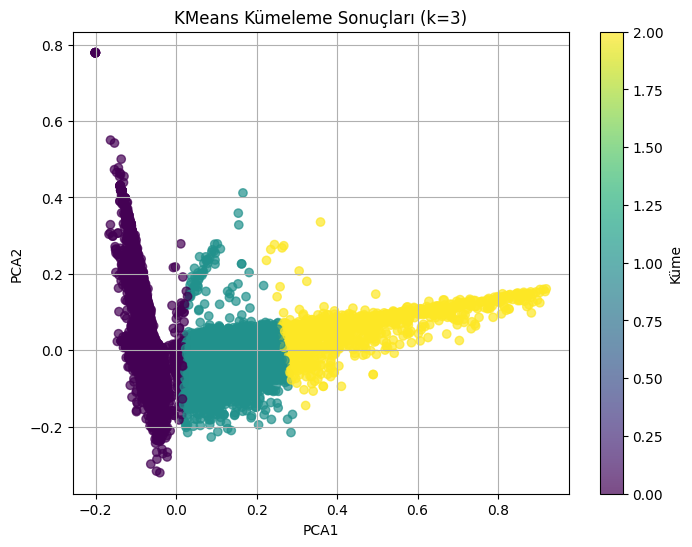

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = "train.csv"
data = pd.read_csv(file_path)
texts = data['text']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(texts)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())


range_clusters = range(1, 11)
inertia_values = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia_values, marker='o', linestyle='--')
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (Kayıp)")
plt.title("Elbow Yöntemi ile Optimal Küme Sayısı")
plt.grid()
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.7)
plt.title(f"KMeans Kümeleme Sonuçları (k={optimal_k})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Küme")
plt.grid()
plt.show()



Silüet Skoru (k=3): 0.5287463610685416
Aykırı Veri Sayısı: 2120
Aykırı Verilerin İndeksleri: [    5    20    37 ... 42371 42375 42392]


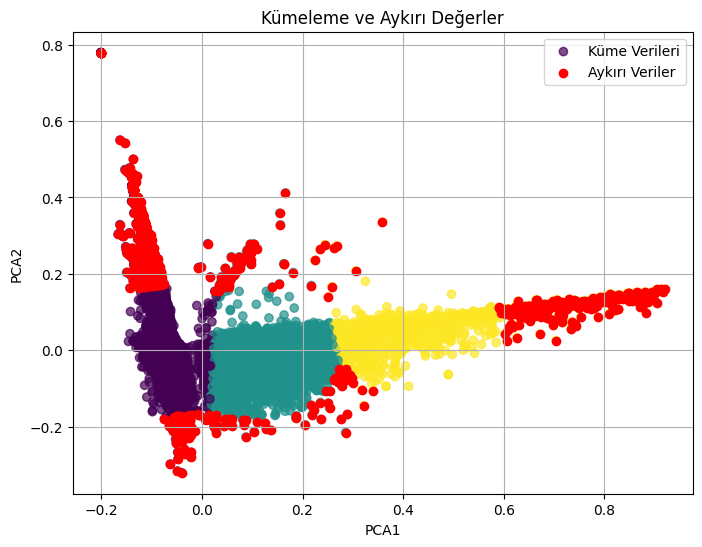

In [5]:
from sklearn.metrics import silhouette_score
import numpy as np

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silüet Skoru (k={optimal_k}): {silhouette_avg}")

distances = np.min(kmeans.transform(X_pca), axis=1)

threshold = np.percentile(distances, 95)
outliers = np.where(distances > threshold)[0]

print(f"Aykırı Veri Sayısı: {len(outliers)}")
print(f"Aykırı Verilerin İndeksleri: {outliers}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, label="Küme Verileri")
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], color='red', label="Aykırı Veriler")
plt.title("Kümeleme ve Aykırı Değerler")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()
